### Projeto Final
### Equipe Thiago Farias e Natascha Weber

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dados do Spotify

In [3]:
historico1=pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Dados_Spotify_Descomprimido/MyData/StreamingHistory0.json')
historico1.head()

,endTime,artistName,trackName,msPlayed
0,2020-07-18 00:01,Metric,Gimme Sympathy - Acoustic,207040
1,2020-07-18 00:04,Metric,Gimme Sympathy - Acoustic,207040
2,2020-07-18 00:06,Mirah,Special Death,96810
3,2020-07-18 00:07,Beck,Ramona,45210
4,2020-07-18 00:11,The Bluetones,Sleazy Bed Track,19747


In [4]:
historico2=pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Dados_Spotify_Descomprimido/MyData/StreamingHistory1.json')
historico2.head()

,endTime,artistName,trackName,msPlayed
0,2020-11-02 00:10,Garbage,Stupid Girl,390
1,2020-11-02 00:10,Lady Gaga,Paparazzi,1070
2,2020-11-02 00:10,Ida Maria,Bad Karma,1450
3,2020-11-02 00:14,Gwen Stefani,The Sweet Escape,246466
4,2020-11-02 00:19,Joy Division,Dead Souls,295506


In [5]:
historico3=pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Dados_Spotify_Descomprimido/MyData/StreamingHistory2.json')
historico3.head()

,endTime,artistName,trackName,msPlayed
0,2021-02-16 17:36,La Roux,Bulletproof,205692
1,2021-02-16 17:39,Gino Paoli,Senza fine,167443
2,2021-02-16 17:45,Queen,Bohemian Rhapsody - Remastered 2011,354204
3,2021-02-16 17:48,Hole,Miss World,179912
4,2021-02-16 17:52,Marina Lima,Nosso Estranho Amor,225706


In [6]:
frames=(historico1,historico2,historico3)
hist_final=pd.concat(frames)
hist_final.shape

(25171, 4)

In [7]:
hist_final.head()

,endTime,artistName,trackName,msPlayed
0,2020-07-18 00:01,Metric,Gimme Sympathy - Acoustic,207040
1,2020-07-18 00:04,Metric,Gimme Sympathy - Acoustic,207040
2,2020-07-18 00:06,Mirah,Special Death,96810
3,2020-07-18 00:07,Beck,Ramona,45210
4,2020-07-18 00:11,The Bluetones,Sleazy Bed Track,19747


In [8]:
hist_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     25171 non-null  object
 1   artistName  25171 non-null  object
 2   trackName   25171 non-null  object
 3   msPlayed    25171 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 983.2+ KB


In [114]:
hist_final.describe()

,msPlayed,year,day
count,2.517100e+04,25171.000000,25171.000000
mean,1.246311e+05,2020.283302,15.929959
std,1.368466e+05,0.450611,8.615684
min,0.000000e+00,2020.000000,1.000000
25%,1.319500e+03,2020.000000,9.000000
50%,1.221330e+05,2020.000000,16.000000
75%,2.262660e+05,2021.000000,24.000000
max,3.064058e+06,2021.000000,31.000000


In [9]:
hist_final['trackName'].value_counts()

Circles                                 194
I Ran (So Far Away)                     190
Major Tom - Coming Home                 139
Bad Guy                                 137
I Was Made For Lovin' You               132
                                       ... 
Hazard                                    1
Só Mais um Beijo - Ao Vivo                1
Jorge Maravilha                           1
Try A Little Tenderness                   1
I'll Never Love Again - Film Version      1
Name: trackName, Length: 2000, dtype: int64

In [10]:
hist_final.groupby(hist_final['trackName']).agg(max).sort_values('msPlayed',ascending=False)

,endTime,artistName,msPlayed
trackName,,,
"#6 - Como é estagiar no grupo Movile | Camila Monteiro, Analista de Employer Branding na Movile",2020-10-23 13:51,Estagiário Sênior,3064058
A Romantização do Desinteresse - Controle Y,2020-07-22 18:42,Controle Y,2894847
Episódio 20: A negação é importantíssima ao bem-estar,2020-10-10 00:43,Respondendo em Voz Alta,2441020
Episódio 15 – Pajubá,2020-07-29 18:21,Babel Podcast,2425076
T2E2 — Mijar no mar é ecossocialismo?,2020-12-22 13:46,Respondendo em Voz Alta,2308810
...,...,...,...
Out Of Reach,2020-09-20 09:28,Gabrielle,0
The Way You Look Tonight,2020-09-20 09:27,Rod Stewart,0
De Volta Pro Futuro,2020-12-15 02:59,Roupa Nova,0


In [11]:
duracao = hist_final.groupby('trackName').min().msPlayed.sum()
duracao

114926647

In [12]:
hist_final['endTime']=pd.to_datetime(hist_final['endTime'])

In [13]:
hist_final['year']=pd.DatetimeIndex(hist_final['endTime']).year
hist_final['month']=pd.DatetimeIndex(hist_final['endTime']).month
hist_final['day']=pd.DatetimeIndex(hist_final['endTime']).day
hist_final['day_name']=hist_final['endTime'].dt.day_name()




In [14]:
hist_final['day_name'].value_counts()

Thursday     4738
Tuesday      3914
Saturday     3719
Sunday       3654
Wednesday    3178
Friday       3145
Monday       2823
Name: day_name, dtype: int64

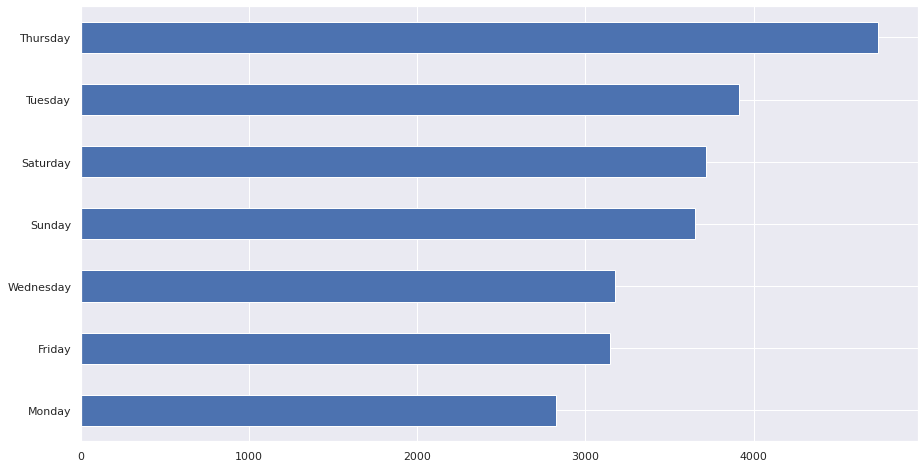

In [108]:
hist_final['day_name'].value_counts().sort_values().plot(kind='barh',figsize=(15,8))

In [15]:
def get_part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

hist_final['part_of_day'] = hist_final['endTime'].dt.hour.apply(get_part_of_day)

In [16]:
# mudando valores coluna mês para seus devidos nomes
month = {	
    1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'		
}

hist_final["month"].replace(month, inplace=True)
hist_final.head()

,endTime,artistName,trackName,msPlayed,year,month,day,day_name,part_of_day
0,2020-07-18 00:01:00,Metric,Gimme Sympathy - Acoustic,207040,2020,July,18,Saturday,Late Night
1,2020-07-18 00:04:00,Metric,Gimme Sympathy - Acoustic,207040,2020,July,18,Saturday,Late Night
2,2020-07-18 00:06:00,Mirah,Special Death,96810,2020,July,18,Saturday,Late Night
3,2020-07-18 00:07:00,Beck,Ramona,45210,2020,July,18,Saturday,Late Night
4,2020-07-18 00:11:00,The Bluetones,Sleazy Bed Track,19747,2020,July,18,Saturday,Late Night


In [105]:
hist_final['trackName'].value_counts().head()

Circles                      194
I Ran (So Far Away)          190
Major Tom - Coming Home      139
Bad Guy                      137
I Was Made For Lovin' You    132
Name: trackName, dtype: int64

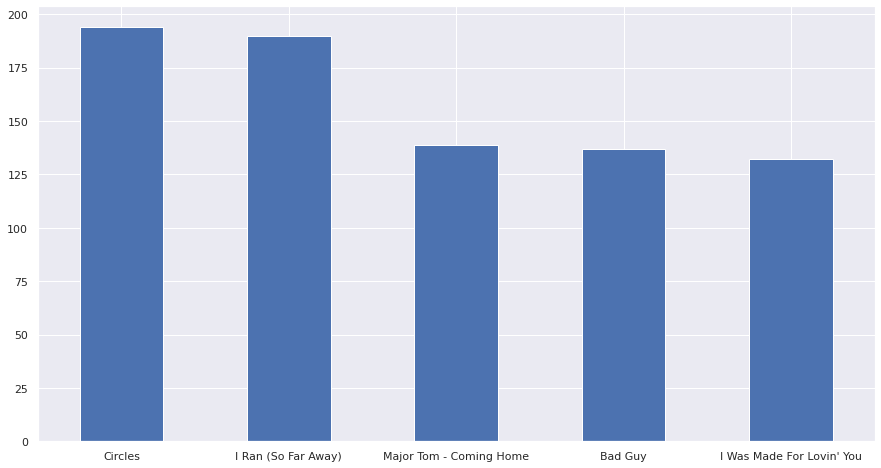

In [106]:
hist_final['trackName'].value_counts().head().plot(kind='bar',figsize=(15,8),rot=0)

In [17]:
hist_final['part_of_day'].value_counts()

Late Night       7824
Evening          5092
Night            4946
Noon             3549
Early Morning    1929
Morning          1831
Name: part_of_day, dtype: int64

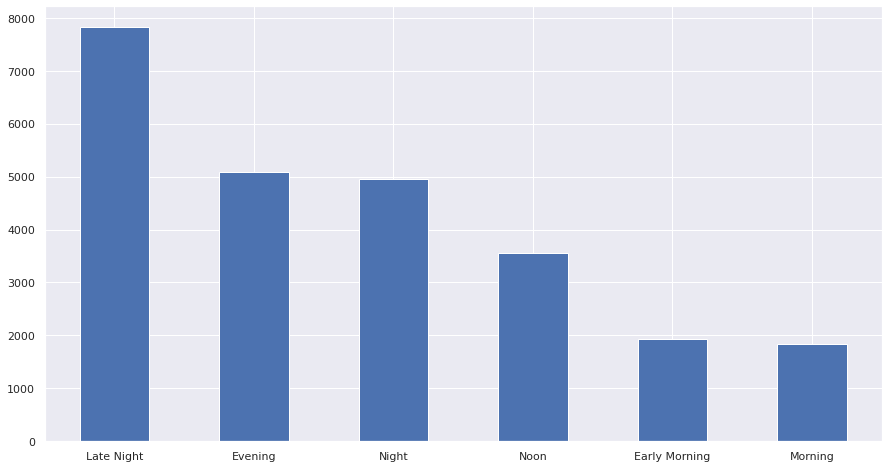

In [103]:
hist_final['part_of_day'].value_counts().plot(kind='bar',figsize=(15,8),rot=0)

In [18]:
with open('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Dados_Spotify_Descomprimido/MyData/YourLibrary.json', encoding="utf8") as f:
    biblioteca=json.load(f)

type(biblioteca)

dict

In [19]:
biblioteca.keys()

dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'artists', 'bannedArtists', 'other'])

In [20]:
faixas=pd.json_normalize(biblioteca['tracks'])
albuns=pd.json_normalize(biblioteca['albums'])
podcasts=pd.json_normalize(biblioteca['shows'])
artistas=pd.json_normalize(biblioteca['artists'])

In [21]:
with open('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Dados_Spotify_Descomprimido/MyData/SearchQueries.json', encoding="utf8") as f:
   pesquisa=json.load(f)

type(pesquisa)

list

In [22]:
pesquisa_dict={
    'platform':[],
    'searchTime':[],
    'searchInteractionURIs':[]

}
for i in pesquisa:
  for d in i:
    pesquisa_dict['platform'].append(i['platform'])
    pesquisa_dict['searchTime'].append(i['searchTime'])
    pesquisa_dict['searchInteractionURIs'].append(i['searchInteractionURIs'])
pesquisa_dict

{'platform': ['ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID',
  'ANDROID'],
 'searchInteractionURIs': [['spotify:track:0Fyj9w0HVfjoxm9S8nGClt'],
  ['spotify:track:0Fyj9w0HVfjoxm9S8nGClt'],
  ['spotify:track:0Fyj9w0HVfjoxm9S8nGClt'],
  ['spotify:track:0Fyj9w0HVfjoxm9S8nGClt'],
  ['spotify:track:1t5ER6twfytz8d40UAy5nN'],
  ['spotify:track:1t5ER6twfytz8d40UAy5nN'],
  ['spotify:track:1t5ER6twfytz8d40UAy5nN'],
  ['spotify:track:1t5ER6twfytz8d40UAy5nN'],
  ['spotify:artist:1b8kpp4DUwt1hWaxTiWQhD'],
  ['spotify:artist:1b8kpp4DUwt1hWaxTiWQhD'],
  ['spotify:artist:1b8kpp4DUwt1hWaxTiWQhD'],
  ['spotify:artist:1b8kpp4DUwt1hWaxTiWQhD'],
  ['spotify:track:4cZGdje7UXxBsJViy2Cs8Z'],
  ['spotify:track:4cZGdje7UXxBsJViy2Cs8Z'],
  ['spotify:track:4cZGdje7UXxBsJViy2Cs8Z'],
  ['spotify:track:4cZGdje7UXxBsJViy2Cs

In [23]:
df=pd.DataFrame(pesquisa_dict)
df

,platform,searchTime,searchInteractionURIs
0,ANDROID,2021-06-20T07:22:57.666Z[UTC],[spotify:track:0Fyj9w0HVfjoxm9S8nGClt]
1,ANDROID,2021-06-20T07:22:57.666Z[UTC],[spotify:track:0Fyj9w0HVfjoxm9S8nGClt]
2,ANDROID,2021-06-20T07:22:57.666Z[UTC],[spotify:track:0Fyj9w0HVfjoxm9S8nGClt]
3,ANDROID,2021-06-20T07:22:57.666Z[UTC],[spotify:track:0Fyj9w0HVfjoxm9S8nGClt]
4,ANDROID,2021-06-25T03:17:01.581Z[UTC],[spotify:track:1t5ER6twfytz8d40UAy5nN]
5,ANDROID,2021-06-25T03:17:01.581Z[UTC],[spotify:track:1t5ER6twfytz8d40UAy5nN]
6,ANDROID,2021-06-25T03:17:01.581Z[UTC],[spotify:track:1t5ER6twfytz8d40UAy5nN]
7,ANDROID,2021-06-25T03:17:01.581Z[UTC],[spotify:track:1t5ER6twfytz8d40UAy5nN]
8,ANDROID,2021-06-29T04:41:14.943Z[UTC],[spotify:artist:1b8kpp4DUwt1hWaxTiWQhD]
9,ANDROID,2021-06-29T04:41:14.943Z[UTC],[spotify:artist:1b8kpp4DUwt1hWaxTiWQhD]


In [24]:
df.explode('searchInteractionURIs')

,platform,searchTime,searchInteractionURIs
0,ANDROID,2021-06-20T07:22:57.666Z[UTC],spotify:track:0Fyj9w0HVfjoxm9S8nGClt
1,ANDROID,2021-06-20T07:22:57.666Z[UTC],spotify:track:0Fyj9w0HVfjoxm9S8nGClt
2,ANDROID,2021-06-20T07:22:57.666Z[UTC],spotify:track:0Fyj9w0HVfjoxm9S8nGClt
3,ANDROID,2021-06-20T07:22:57.666Z[UTC],spotify:track:0Fyj9w0HVfjoxm9S8nGClt
4,ANDROID,2021-06-25T03:17:01.581Z[UTC],spotify:track:1t5ER6twfytz8d40UAy5nN
5,ANDROID,2021-06-25T03:17:01.581Z[UTC],spotify:track:1t5ER6twfytz8d40UAy5nN
6,ANDROID,2021-06-25T03:17:01.581Z[UTC],spotify:track:1t5ER6twfytz8d40UAy5nN
7,ANDROID,2021-06-25T03:17:01.581Z[UTC],spotify:track:1t5ER6twfytz8d40UAy5nN
8,ANDROID,2021-06-29T04:41:14.943Z[UTC],spotify:artist:1b8kpp4DUwt1hWaxTiWQhD
9,ANDROID,2021-06-29T04:41:14.943Z[UTC],spotify:artist:1b8kpp4DUwt1hWaxTiWQhD


In [115]:
df['platform'].value_counts()

ANDROID    20
Name: platform, dtype: int64

In [116]:
df.describe()

,platform,searchTime,searchInteractionURIs
count,20,20,20
unique,1,5,5
top,ANDROID,2021-06-20T07:22:57.666Z[UTC],[spotify:artist:1b8kpp4DUwt1hWaxTiWQhD]
freq,20,4,4


In [25]:
df.to_csv('dispositivos.csv')


#### Passando as planilhas para csv

In [26]:
hist_final.to_csv('historicoFinal.csv')
faixas.to_csv('faixas.csv')
albuns.to_csv('albuns.csv')
podcasts.to_csv('podcasts.csv')
artistas.to_csv('artistas.csv')

### Dados Ifood

In [27]:
pedidos=pd.read_csv('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Ifood_Descomprimido/pedidos..csv')
pedidos.head()

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido
0,2a61cc67-e25a-4551-ab88-abd3afa409f8,659606489,Domino's Pizza - Vinhedo,72.50,CONCLUDED,2018-01-04,2019-05-27
1,2a61cc67-e25a-4551-ab88-abd3afa409f8,390388599,Dominos Pizza - Cambui,70.40,CONCLUDED,2018-01-04,2019-01-01
2,2a61cc67-e25a-4551-ab88-abd3afa409f8,725971067,Mineiro Delivery - Valinhos,69.98,CONCLUDED,2018-01-04,2019-06-23
3,2a61cc67-e25a-4551-ab88-abd3afa409f8,191171420,Oficina Dos Sabores,24.00,CONCLUDED,2018-01-04,2018-02-27
4,2a61cc67-e25a-4551-ab88-abd3afa409f8,166497544,Estacao Das Pizzas,27.99,CONCLUDED,2018-01-04,2018-01-11


In [28]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_usuario     386 non-null    object 
 1   id_pedido      386 non-null    int64  
 2   restaurante    386 non-null    object 
 3   valor          386 non-null    float64
 4   status         386 non-null    object 
 5   data_registro  386 non-null    object 
 6   data_pedido    386 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.2+ KB


In [111]:
pedidos['data_pedido']=pd.to_datetime(pedidos['data_pedido'])

In [112]:
pedidos['year']=pd.DatetimeIndex(pedidos['data_pedido']).year
pedidos['month']=pd.DatetimeIndex(pedidos['data_pedido']).month
pedidos['day']=pd.DatetimeIndex(pedidos['data_pedido']).day
pedidos['day_name']=pedidos['data_pedido'].dt.day_name()

pedidos.head()

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido,year,month,day,day_name
0,2a61cc67-e25a-4551-ab88-abd3afa409f8,659606489,Domino's Pizza - Vinhedo,72.50,CONCLUDED,2018-01-04,2019-05-27,2019,5,27,Monday
1,2a61cc67-e25a-4551-ab88-abd3afa409f8,390388599,Dominos Pizza - Cambui,70.40,CONCLUDED,2018-01-04,2019-01-01,2019,1,1,Tuesday
2,2a61cc67-e25a-4551-ab88-abd3afa409f8,725971067,Mineiro Delivery - Valinhos,69.98,CONCLUDED,2018-01-04,2019-06-23,2019,6,23,Sunday
3,2a61cc67-e25a-4551-ab88-abd3afa409f8,191171420,Oficina Dos Sabores,24.00,CONCLUDED,2018-01-04,2018-02-27,2018,2,27,Tuesday
4,2a61cc67-e25a-4551-ab88-abd3afa409f8,166497544,Estacao Das Pizzas,27.99,CONCLUDED,2018-01-04,2018-01-11,2018,1,11,Thursday


In [113]:
pedidos.describe()

,id_pedido,valor,year,month,day
count,3.860000e+02,386.000000,386.000000,386.000000,386.000000
mean,1.842785e+09,47.347435,2019.712435,7.077720,15.544041
std,1.066859e+09,25.023436,0.910374,3.069612,8.844362
min,1.637035e+08,8.900000,2018.000000,1.000000,1.000000
25%,8.037475e+08,30.600000,2019.000000,5.000000,7.250000
50%,2.060331e+09,42.000000,2020.000000,7.000000,15.500000
75%,2.600246e+09,57.987500,2020.000000,10.000000,23.000000
max,4.115862e+09,287.100000,2021.000000,12.000000,31.000000


In [95]:
pedidos['day_name'].value_counts()

Sunday       68
Thursday     64
Saturday     58
Friday       53
Tuesday      51
Wednesday    49
Monday       43
Name: day_name, dtype: int64

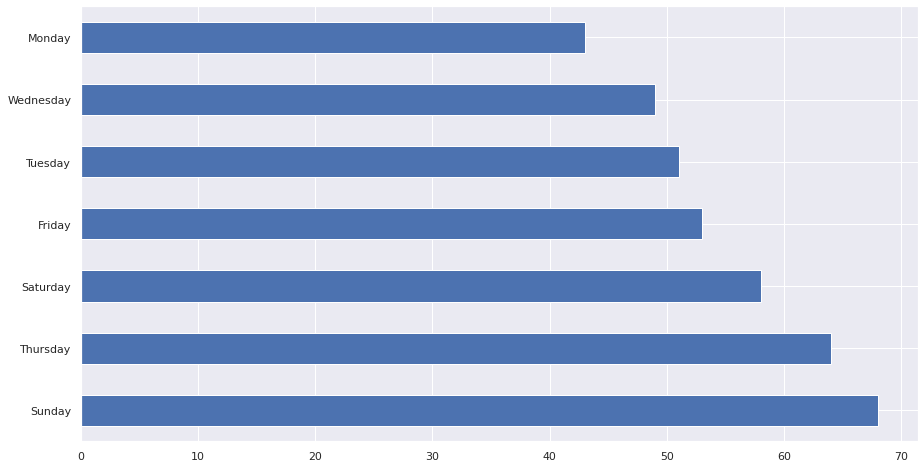

In [96]:
pedidos['day_name'].value_counts().plot(kind='barh', figsize=(15,8))

In [32]:
month = {	
    1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'		
}

pedidos["month"].replace(month, inplace=True)
pedidos.head()

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido,year,month,day,day_name
0,2a61cc67-e25a-4551-ab88-abd3afa409f8,659606489,Domino's Pizza - Vinhedo,72.50,CONCLUDED,2018-01-04,2019-05-27,2019,May,27,Monday
1,2a61cc67-e25a-4551-ab88-abd3afa409f8,390388599,Dominos Pizza - Cambui,70.40,CONCLUDED,2018-01-04,2019-01-01,2019,January,1,Tuesday
2,2a61cc67-e25a-4551-ab88-abd3afa409f8,725971067,Mineiro Delivery - Valinhos,69.98,CONCLUDED,2018-01-04,2019-06-23,2019,June,23,Sunday
3,2a61cc67-e25a-4551-ab88-abd3afa409f8,191171420,Oficina Dos Sabores,24.00,CONCLUDED,2018-01-04,2018-02-27,2018,February,27,Tuesday
4,2a61cc67-e25a-4551-ab88-abd3afa409f8,166497544,Estacao Das Pizzas,27.99,CONCLUDED,2018-01-04,2018-01-11,2018,January,11,Thursday


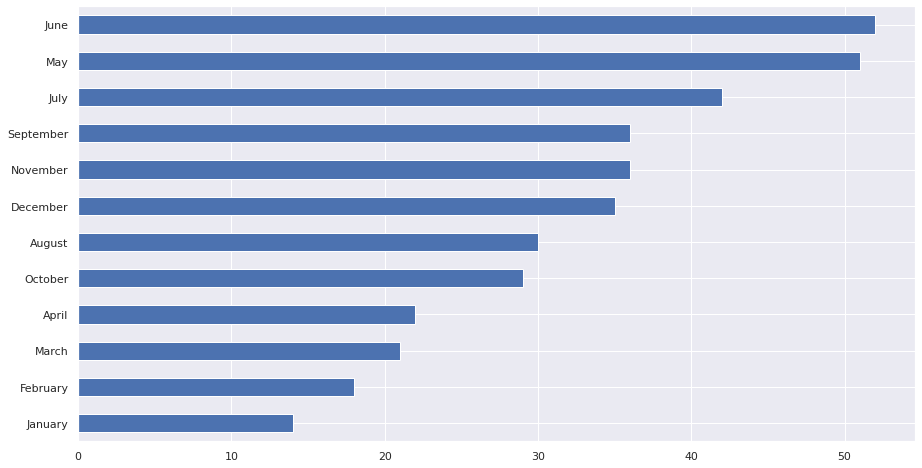

In [94]:
pedidos['month'].value_counts().sort_values().plot(kind='barh',figsize=(15,8))

In [33]:
pedidos['valor'].sum()

18276.11

In [88]:
pedidos['restaurante'].value_counts().head()

Mcdonald's - Estrada Da Bioada    28
Marmitaria Tempero Fino           18
Habib's - Vinhedo                 17
Domino's Pizza - Vinhedo          16
Bodegon 2260                      13
Name: restaurante, dtype: int64

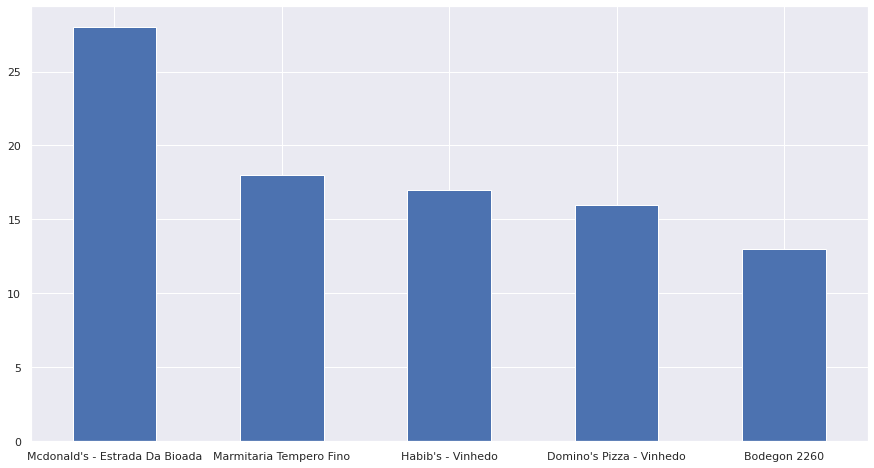

In [93]:
pedidos['restaurante'].value_counts().head().plot(kind='bar',rot=0, figsize=(15,8))

In [35]:
enderecos=pd.read_csv('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/Ifood_Descomprimido/enderecos..csv')
enderecos.head()

,id_usuario,tipo,logradouro,numero,complemento,bairro,cidade,estado,pais,data_registro
0,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,AV AVENIDA JOSE ROCHA BOMFIM 214,214,SIDNEY NÚMERO 1116,LOTEAMENTO CENTER SANTA GENEBRA,CAMPINAS,SP,BR,2018-12-06
1,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,AV FRANCISCO GLICERIO,2040,52,VILA ITAPURA,CAMPINAS,SP,BR,2018-03-11
2,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,AV SANTA ISABEL,12,NaN,BARAO GERALDO,CAMPINAS,SP,BR,2018-03-18
3,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,RUA DAS NACOES UNIDAS,600,303 BLOCO 61,OLARIA,SALTO,SP,BR,2019-01-31
4,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,R. JAPÃO,600,BLOCO 61 AP 303,JARDIM PLANALTO,SALTO,SP,BR,2019-05-18


In [36]:
enderecos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_usuario     30 non-null     object
 1   tipo           3 non-null      object
 2   logradouro     30 non-null     object
 3   numero         30 non-null     object
 4   complemento    17 non-null     object
 5   bairro         30 non-null     object
 6   cidade         30 non-null     object
 7   estado         30 non-null     object
 8   pais           30 non-null     object
 9   data_registro  30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [37]:
enderecos['cidade'].replace(['SUMARE'], 'SUMARÉ', inplace=True)
enderecos.loc[enderecos['cidade']=='SUMARÉ']

,id_usuario,tipo,logradouro,numero,complemento,bairro,cidade,estado,pais,data_registro
13,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,AV CABO PEDRO HOFFMAN,420,AP11 BLOCO 24,RESIDENCIAL REAL PARQUE SUMARE,SUMARÉ,SP,BR,2018-01-04
22,2a61cc67-e25a-4551-ab88-abd3afa409f8,NaN,AV. CABO PEDRO HOFFMAN,420,AP 11 BLOCO 24,RES. REAL PARK SUMARÉ,SUMARÉ,SP,BR,2020-03-08


In [38]:
pedidos.to_csv('pedidos.csv')
enderecos.to_csv('enderecos.csv')


### Dados Facebook

In [39]:
grupos=pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/facebook-nataschafweber/activity_messages/group_interactions.json',encoding='utf-8')

In [40]:
grupos.head()

,group_interactions_v2
0,"{'name': '', 'description': '', 'entries': [{'..."


In [41]:
entries=pd.json_normalize(grupos['group_interactions_v2'])['entries']


In [42]:
type(entries)



pandas.core.series.Series

In [43]:
entries=entries.to_dict()

In [44]:
entries.keys()

dict_keys([0])

In [45]:
name= pd.json_normalize(entries[0])
name

,data.name,data.value,data.uri
0,Bloco das Recalcada,7.335 vezes,https://www.facebook.com/groups/400179916659076/
1,Unicamp,7.308 vezes,https://www.facebook.com/groups/GrupoUnicamp/
2,LDRV,4.861 vezes,https://www.facebook.com/groups/LDRV12/
3,CGK WE â¥ U,3.255 vezes,https://www.facebook.com/groups/406373942826519/
4,Site dos Menes - O Grupo,2.690 vezes,https://www.facebook.com/groups/sitedosmenes/
...,...,...,...
187,Alunos ADS IFSP Campinas,1 vez,https://www.facebook.com/groups/224797324384626/
188,Fenda Das Bonecas,1 vez,https://www.facebook.com/groups/bonecasrift/
189,GLBT| LGBT- Gay Irlanda|Ireland|Dublin,1 vez,https://www.facebook.com/groups/GLBT.Irlanda/
190,LGBT Brasil,1 vez,https://www.facebook.com/groups/lgbtbr/


In [46]:
type(name)

pandas.core.frame.DataFrame

In [47]:
pessoas=pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/facebook-nataschafweber/activity_messages/people_and_friends.json')
pessoas

,people_interactions_v2
0,"{'name': '', 'description': '', 'entries': [{'..."


In [48]:
name= pd.json_normalize(pessoas['people_interactions_v2'])

In [49]:
type(name)

pandas.core.frame.DataFrame

In [50]:
name=name.to_dict()

In [51]:
people= pd.json_normalize(name['entries'], record_path=[0])
people

,timestamp,data.name,data.uri
0,1626633107,Vanessa Clarindo,https://www.facebook.com/vanessa.clarindo
1,1626392208,Alesandra Fontanesi,https://www.facebook.com/alesandrafontanesi
2,1626372894,Gaby Vidal,https://www.facebook.com/gabrielly.vidal.313
3,1626189594,Ueliton Silva,https://www.facebook.com/profile.php?id=100039...
4,1626119151,Natascha Weber,https://www.facebook.com/natascha.fweber
...,...,...,...
1200,1499857026,Heitor Ferreira,https://www.facebook.com/heitor.ferreira.718
1201,1499855741,OtÃ¡vio BonfÃ¡,https://www.facebook.com/otavio.bonfa
1202,1499824268,Esdras Andrade Araujo,https://www.facebook.com/esdras.animais
1203,1499782022,Anonymous User,https://www.facebook.com/profile.php?id=130963...


In [52]:
reacoes = pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/facebook-nataschafweber/comments_and_reactions/posts_and_comments.json')
reacoes

,reactions_v2
0,"{'timestamp': 1297135801, 'data': [{'reaction'..."
1,"{'timestamp': 1297114840, 'data': [{'reaction'..."
2,"{'timestamp': 1297113867, 'data': [{'reaction'..."
3,"{'timestamp': 1297109655, 'data': [{'reaction'..."
4,"{'timestamp': 1297106780, 'data': [{'reaction'..."
...,...
156410,"{'timestamp': 1626593701, 'data': [{'reaction'..."
156411,"{'timestamp': 1626593309, 'data': [{'reaction'..."
156412,"{'timestamp': 1626592813, 'data': [{'reaction'..."
156413,"{'timestamp': 1626592717, 'data': [{'reaction'..."


In [53]:
reacoes2=pd.json_normalize(reacoes['reactions_v2'], max_level=2)

In [54]:

reacoes2.explode('data')

,timestamp,data,title,attachments
0,1297135801,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu uma publicaÃ§Ã£o de Leti...,NaN
1,1297114840,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu o comentÃ¡rio de Leandro...,NaN
2,1297113867,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu uma publicaÃ§Ã£o de Caio...,NaN
3,1297109655,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu o link de Thiago Alves.,NaN
4,1297106780,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu uma publicaÃ§Ã£o de Caio...,NaN
...,...,...,...,...
156410,1626593701,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu a foto de Suzana Ginez.,NaN
156411,1626593309,"{'reaction': {'reaction': 'LIKE', 'actor': 'Na...",Natascha Weber curtiu uma publicaÃ§Ã£o de Math...,NaN
156412,1626592813,"{'reaction': {'reaction': 'HAHA', 'actor': 'Na...",Natascha Weber reagiu a uma publicaÃ§Ã£o.,NaN
156413,1626592717,"{'reaction': {'reaction': 'HAHA', 'actor': 'Na...",Natascha Weber reagiu a uma publicaÃ§Ã£o.,NaN


In [55]:
reacoes_lista=[]
for i in reacoes2['data']:
  reacoes_lista.append(i[0]['reaction']['reaction'])

In [56]:
lista = pd.Series(reacoes_lista)

In [57]:
reacoes2['reacoes']=lista

In [58]:
reacoes2.head()

,timestamp,data,title,attachments,reacoes
0,1297135801,"[{'reaction': {'reaction': 'LIKE', 'actor': 'N...",Natascha Weber curtiu uma publicaÃ§Ã£o de Leti...,NaN,LIKE
1,1297114840,"[{'reaction': {'reaction': 'LIKE', 'actor': 'N...",Natascha Weber curtiu o comentÃ¡rio de Leandro...,NaN,LIKE
2,1297113867,"[{'reaction': {'reaction': 'LIKE', 'actor': 'N...",Natascha Weber curtiu uma publicaÃ§Ã£o de Caio...,NaN,LIKE
3,1297109655,"[{'reaction': {'reaction': 'LIKE', 'actor': 'N...",Natascha Weber curtiu o link de Thiago Alves.,NaN,LIKE
4,1297106780,"[{'reaction': {'reaction': 'LIKE', 'actor': 'N...",Natascha Weber curtiu uma publicaÃ§Ã£o de Caio...,NaN,LIKE


In [59]:
reacoes2['reacoes'].value_counts()

LIKE       126973
HAHA        16772
LOVE         9976
SORRY        1129
WOW           838
ANGER         666
DOROTHY        38
TOTO           23
Name: reacoes, dtype: int64

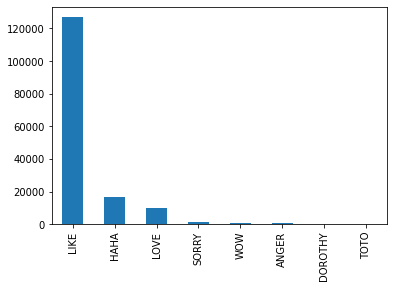

In [60]:
reacoes2['reacoes'].value_counts().plot(kind='bar')

In [61]:
reacoes_facebook = reacoes2['reacoes'].value_counts()
reacoes_facebook = reacoes_facebook .to_frame()
reacoes_facebook = reacoes_facebook .rename(columns={"reacoes": "numero_reacoes"})
reacoes_facebook

,numero_reacoes
LIKE,126973
HAHA,16772
LOVE,9976
SORRY,1129
WOW,838
ANGER,666
DOROTHY,38
TOTO,23


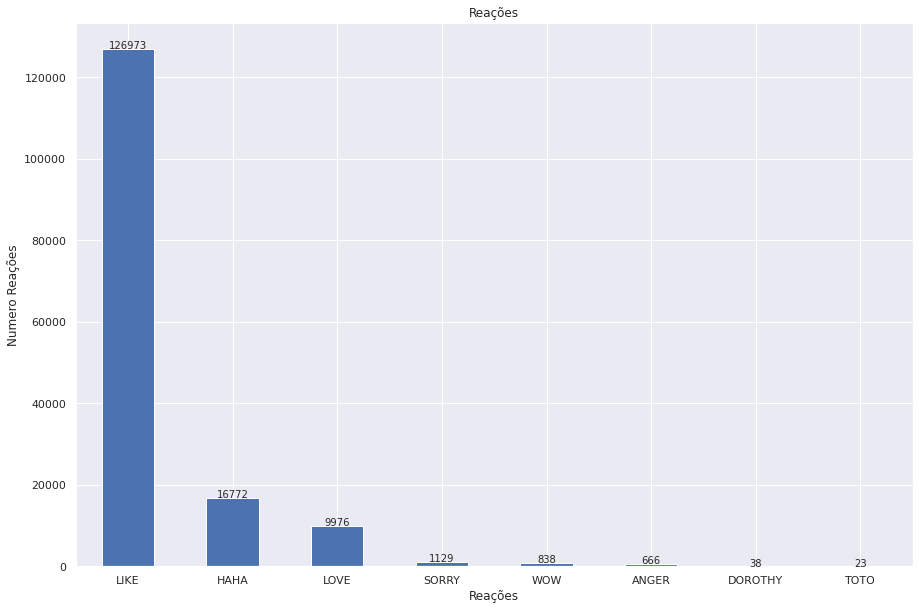

In [100]:
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Reações')
reacoes_facebook["numero_reacoes"].plot.bar()

for index, data in enumerate(reacoes_facebook["numero_reacoes"]):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Reações')
plt.ylabel('Numero Reações')
plt.xticks(rotation=0)
plt.show()

In [63]:
people.to_csv(pessoas.csv')

In [64]:
people.groupby(people['data.name']).agg('count').sort_values('timestamp',ascending=False)

,timestamp,data.uri
data.name,,
Ricardo Marques,2,2
Rafael Almeida,2,2
AdÃ©lia Bonatto Marconato,2,2
Eric Silva,2,2
Mateus Nunes,2,2
...,...,...
Gabrielli Luciana,1,1
Gabriella Longhi,1,1
Gabriele Piato,1,1


In [65]:
horas=pd.read_json('/content/drive/MyDrive/3_VAMO_AI/Dados_Natascha/facebook-nataschafweber/security_and_login_information/your_facebook_activity_history.json')
horas



,last_activity_v2
last_activity_time,"{'Site': {'activity_by_day': [1626603364, 1626..."


In [66]:
horas=pd.json_normalize(horas['last_activity_v2'])


In [67]:
horas

,Site.activity_by_day,Aplicativo do Facebook.activity_by_day,Android.activity_by_day,Web no celular.activity_by_day,Facebook Messenger para Android.activity_by_day
0,"[1626603364, 1626516964, 1626430564, 162634416...","[1626603364, 1626516964, 1626430564, 162634416...","[1626603364, 1626516964, 1626430564, 162634416...","[1622715364, 1621851364, 1621160164]","[1626344164, 1625566564, 1625480164, 162539376..."


In [68]:
horas=horas.explode('Site.activity_by_day')


In [69]:
horas=horas.explode('Aplicativo do Facebook.activity_by_day')


In [70]:
horas=horas.explode('Android.activity_by_day')


In [71]:
horas=horas.explode('Web no celular.activity_by_day')


In [72]:
horas=horas.explode('Facebook Messenger para Android.activity_by_day')

In [73]:
horas.head()

,Site.activity_by_day,Aplicativo do Facebook.activity_by_day,Android.activity_by_day,Web no celular.activity_by_day,Facebook Messenger para Android.activity_by_day
0,1626603364,1626603364,1626603364,1622715364,1626344164
0,1626603364,1626603364,1626603364,1622715364,1625566564
0,1626603364,1626603364,1626603364,1622715364,1625480164
0,1626603364,1626603364,1626603364,1622715364,1625393764
0,1626603364,1626603364,1626603364,1622715364,1625220964


In [74]:
horas['Site.activity_by_day'] = pd.to_datetime(horas['Site.activity_by_day'], unit='s')


In [75]:
horas.head()

,Site.activity_by_day,Aplicativo do Facebook.activity_by_day,Android.activity_by_day,Web no celular.activity_by_day,Facebook Messenger para Android.activity_by_day
0,2021-07-18 10:16:04,1626603364,1626603364,1622715364,1626344164
0,2021-07-18 10:16:04,1626603364,1626603364,1622715364,1625566564
0,2021-07-18 10:16:04,1626603364,1626603364,1622715364,1625480164
0,2021-07-18 10:16:04,1626603364,1626603364,1622715364,1625393764
0,2021-07-18 10:16:04,1626603364,1626603364,1622715364,1625220964


In [76]:
horas['Aplicativo do Facebook.activity_by_day'] = pd.to_datetime(horas['Aplicativo do Facebook.activity_by_day'], unit='s')
horas['Android.activity_by_day'] = pd.to_datetime(horas['Android.activity_by_day'], unit='s')

In [77]:

horas['Web no celular.activity_by_day'] = pd.to_datetime(horas['Web no celular.activity_by_day'], unit='s') 
horas['Facebook Messenger para Android.activity_by_day'] = pd.to_datetime(horas['Facebook Messenger para Android.activity_by_day'], unit='s') 
horas.head()

,Site.activity_by_day,Aplicativo do Facebook.activity_by_day,Android.activity_by_day,Web no celular.activity_by_day,Facebook Messenger para Android.activity_by_day
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-15 10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-06 10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-05 10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-04 10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-02 10:16:04


In [78]:
horas['teste2'] = horas['Site.activity_by_day'].dt.strftime('%H:%M:%S')

In [79]:
horas.head()

,Site.activity_by_day,Aplicativo do Facebook.activity_by_day,Android.activity_by_day,Web no celular.activity_by_day,Facebook Messenger para Android.activity_by_day,teste2
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-15 10:16:04,10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-06 10:16:04,10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-05 10:16:04,10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-04 10:16:04,10:16:04
0,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-07-18 10:16:04,2021-06-03 10:16:04,2021-07-02 10:16:04,10:16:04


In [80]:
horas['teste2']=pd.to_timedelta(horas['teste2'],unit='D')

ValueError: ignored

In [ ]:
horas['teste2'].sum()

In [ ]:
horas['']